## Support vector machine

Pros:

* It works really well with a clear margin of separation.
* It is effective in high-dimensional spaces.
* It is effective in cases where the number of dimensions is greater than the number of samples.
* It uses a subset of the training set in the decision function (called support vectors), so it is also memory efficient.

Cons:

* It doesn’t perform well when we have a large data set because the required training time is higher.
* It also doesn’t perform very well when the data set has more noise, i.e., target classes are overlapping.
* SVM doesn’t directly provide probability estimates; these are calculated using an expensive five-fold cross-validation.


SVM uses **Kernel trick** to seperate out lowerdimentional inseparable data to higher dimention separable data.
* Linear
* rbf
* Poly

* w`x`+ b >= 0
* if we multiply w, b with value >1 the margin will shrink.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [146]:
# Plot scatter plot for the data
def plot_scatter(X,y):
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=X[:,0],y=X[:,1], marker='o',hue=y)
    plt.show()

In [147]:
from sklearn.datasets import make_classification

X1,y1 = make_classification(n_samples=100, n_classes=2, n_features=2, n_informative=1,n_redundant=0,n_repeated=0,n_clusters_per_class=1)
X1.shape, y1.shape


((100, 2), (100,))

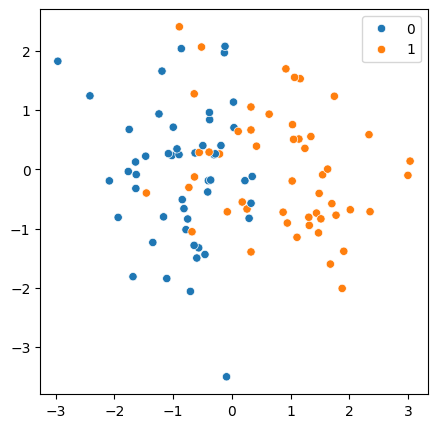

In [148]:
plot_scatter(X1,y1)

In [149]:
from sklearn.datasets import make_circles

X2,y2 = make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=42, factor=0.05)

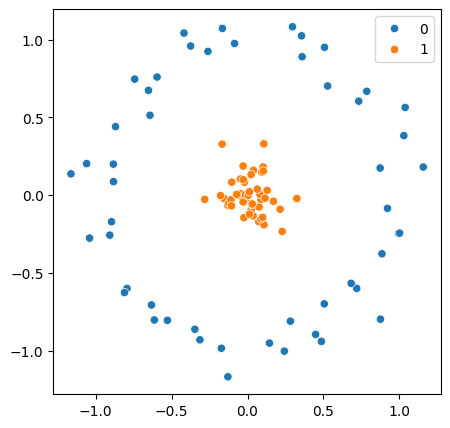

In [150]:
plot_scatter(X2,y2)

In [75]:
## np.where

k = np.array([0,1,0,0,1])
np.where(k <= 0, -1, 1)

array([-1,  1, -1, -1,  1])

In [151]:
class SVM_local:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y): 
        return np.where(y <= 0, -1, 1) # if y<0 then -1, else 1

    def _satisfy_constraint(self, x, idx):
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        self.w -= self.lr * dw
        self.b -= self.lr * db
    
    def fit(self, X, y):
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y) # To get yi based on -ve and +ve

        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        # print(estimate)
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

## Linear classification

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, shuffle=True, random_state=1)

In [108]:
clf = SVM_local(n_iters=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [105]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  1.0


## Circular data

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, shuffle=True, random_state=1)

In [83]:
clf = SVM_local(n_iters=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [84]:
print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  0.3


## Using libraries
* linear
* rbf (radial basis function)
* ploy
* sigmoid (the similarity between two data points is computed using the hyperbolic tangent function

In [164]:
from sklearn.svm import SVC

clf = SVC(kernel="linear", C=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [165]:
print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  0.8


In [154]:
from sklearn.svm import SVC

clf = SVC(kernel="rbf", C=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [155]:
print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  1.0


In [156]:
from sklearn.svm import SVC

clf = SVC(kernel="poly", C=1, degree = 2)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [157]:
print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  1.0


In [176]:
from sklearn.svm import SVC

clf = SVC(kernel="linear", # 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
            C=1, # C: classification regularization error 
            degree=3, # For ploy
            gamma="scale",  ## {scale or auto} # controls the influence of each individual training sample on the decision boundary 
            coef0=0.0, 
            shrinking=False, #  Whether to use the shrinking heuristic.
            probability=True,
            tol=1e-3, # Tolerance for stopping criterion.
            cache_size=200,
            class_weight=None,
            verbose=True,
            max_iter=-1, # -1 for no limit
            decision_function_shape="ovr", # {'ovo', 'ovr'}, 
            break_ties=False,
            random_state=None)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

[LibSVM]..*
optimization finished, #iter = 166
obj = -27.868179, rho = -0.001055
nSV = 31, nBSV = 28
Total nSV = 31
.*
optimization finished, #iter = 102
obj = -27.230999, rho = 0.147719
nSV = 30, nBSV = 27
Total nSV = 30
*
optimization finished, #iter = 37
obj = -30.466386, rho = 0.193187
nSV = 32, nBSV = 29
Total nSV = 32
..*
optimization finished, #iter = 194
obj = -26.170651, rho = 0.260290
nSV = 28, nBSV = 25
Total nSV = 28
.*
optimization finished, #iter = 81
obj = -29.722823, rho = 0.222235
nSV = 32, nBSV = 30
Total nSV = 32
.*
optimization finished, #iter = 153
obj = -35.382358, rho = -0.220590
nSV = 38, nBSV = 35
Total nSV = 38


In [177]:
print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  0.8


In [178]:
clf.predict_proba(X_test)

array([[0.68420205, 0.31579795],
       [0.17835858, 0.82164142],
       [0.85818982, 0.14181018],
       [0.9612499 , 0.0387501 ],
       [0.93223598, 0.06776402],
       [0.82212874, 0.17787126],
       [0.57337363, 0.42662637],
       [0.0664982 , 0.9335018 ],
       [0.06828076, 0.93171924],
       [0.74067541, 0.25932459]])

In [179]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

### Visualization

In [158]:
# Visualizing the scatter plot of the dataset
def visualize_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)

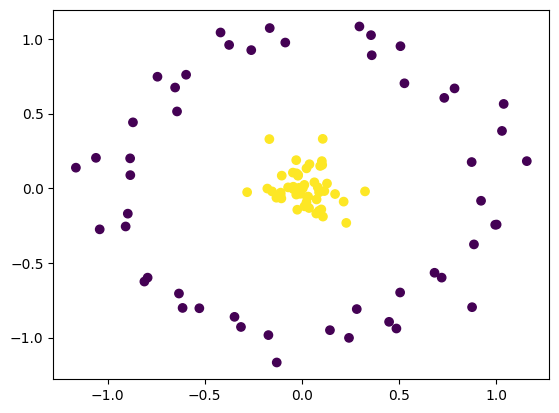

In [127]:
visualize_dataset(X2,y2)


In [133]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) ## To convert 2D array to flattened array 
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params) # Plot filled contours
    return out

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


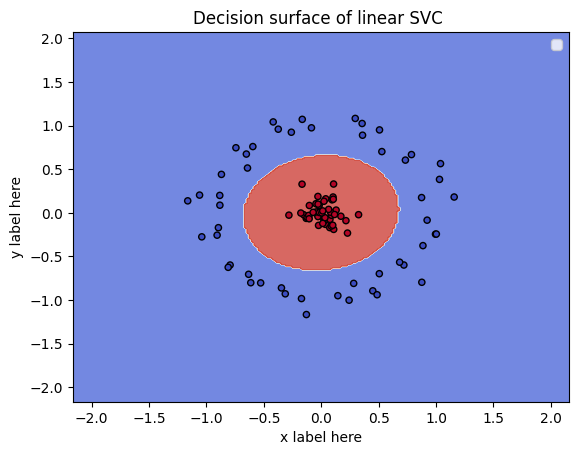

In [144]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X2[:, 0], X2[:, 1]
xx, yy = make_meshgrid(X0, X1)
# print(xx, yy)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y2, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [145]:
len(xx.ravel())

46221